In [0]:
from __future__ import print_function
import keras
import numpy as np
from keras import optimizers
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

Using TensorFlow backend.


In [0]:
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [0]:
batch_size = 256
length = 1850
depth = 32

In [0]:
#create the network
inputs = Input(shape=(length,))
encoded = Dense(1048, activation='relu')(inputs)

decoded = Dense(256, activation='sigmoid')(encoded)
decoded = Dense(7, activation='softmax')(decoded)


#map an input to its reconstruction to create model
model = Model(inputs, decoded)

#create sub network
encoder = Model(inputs, encoded)

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1850)]            0         
_________________________________________________________________
dense (Dense)                (None, 1048)              1939848   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               268544    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1799      
Total params: 2,210,191
Trainable params: 2,210,191
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Let's train the model using optimiser
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
x = lfw_people.data
n_features = x.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
# Split into a training set and a test set using a stratified k fold
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [0]:
x_train.shape

(966, 1850)

In [0]:
'''# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)'''

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(966, 1850)
(322, 1850)


In [0]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Train on 966 samples, validate on 322 samples
Epoch 1/50
966/966 [==============================] - 1s 999us/sample - loss: 1.8358 - acc: 0.3820 - val_loss: 1.6203 - val_acc: 0.4534
Epoch 2/50
966/966 [==============================] - 0s 171us/sample - loss: 1.6886 - acc: 0.4110 - val_loss: 1.6240 - val_acc: 0.3851
Epoch 3/50
966/966 [==============================] - 0s 171us/sample - loss: 1.6332 - acc: 0.4193 - val_loss: 1.5285 - val_acc: 0.5217
Epoch 4/50
966/966 [==============================] - 0s 167us/sample - loss: 1.5228 - acc: 0.4658 - val_loss: 1.5295 - val_acc: 0.4503
Epoch 5/50
966/966 [==============================] - 0s 173us/sample - loss: 1.4662 - acc: 0.4648 - val_loss: 1.3942 - val_acc: 0.5186
Epoch 6/50
966/966 [==============================] - 0s 179us/sample - loss: 1.4053 - acc: 0.5021 - val_loss: 1.2546 - val_acc: 0.5807
Epoch 7/50
966/966 [==============================] - 0s 183us/sample - loss: 1.2477 - acc: 0.5414 - val_loss: 1.1525 - val_acc: 0.5745
Ep

In [0]:
loss, acc = model.evaluate(x_test, y_test)

322/322 [==============================] - 0s 95us/sample - loss: 0.7022 - acc: 0.7950


In [0]:
#Graph - accuracy 
z = np.reshape(x_test, (322,50,37))

In [0]:
x_test.shape

(322, 1850)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


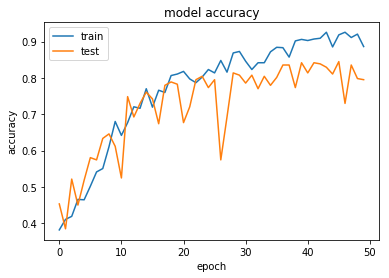

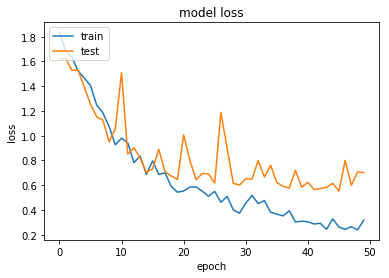

In [0]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

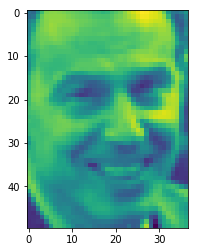

In [0]:
plt.imshow(z[99,:,:])